In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader.data as web
import yfinance as yf

In [3]:
data = yf.download('SPY',start='2000-01-01', end='2021-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.43750,93.591164,8164300
2000-01-04,143.53125,144.06250,139.640625,139.75000,89.931107,8089800
2000-01-05,139.93750,141.53125,137.250000,140.00000,90.092018,12177900
2000-01-06,139.62500,141.50000,137.750000,137.75000,88.644142,6227200
2000-01-07,140.31250,145.75000,140.062500,145.75000,93.792206,8066500
2000-01-10,146.25000,146.90625,145.031250,146.25000,94.114014,5741700
2000-01-11,145.81250,146.09375,143.500000,144.50000,92.987846,7503700
2000-01-12,144.59375,144.59375,142.875000,143.06250,92.062820,6907700
2000-01-13,144.46875,145.75000,143.281250,145.00000,93.309593,5158300


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5284 entries, 2000-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5284 non-null   float64
 1   High       5284 non-null   float64
 2   Low        5284 non-null   float64
 3   Close      5284 non-null   float64
 4   Adj Close  5284 non-null   float64
 5   Volume     5284 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 289.0 KB


In [7]:
from matplotlib import dates

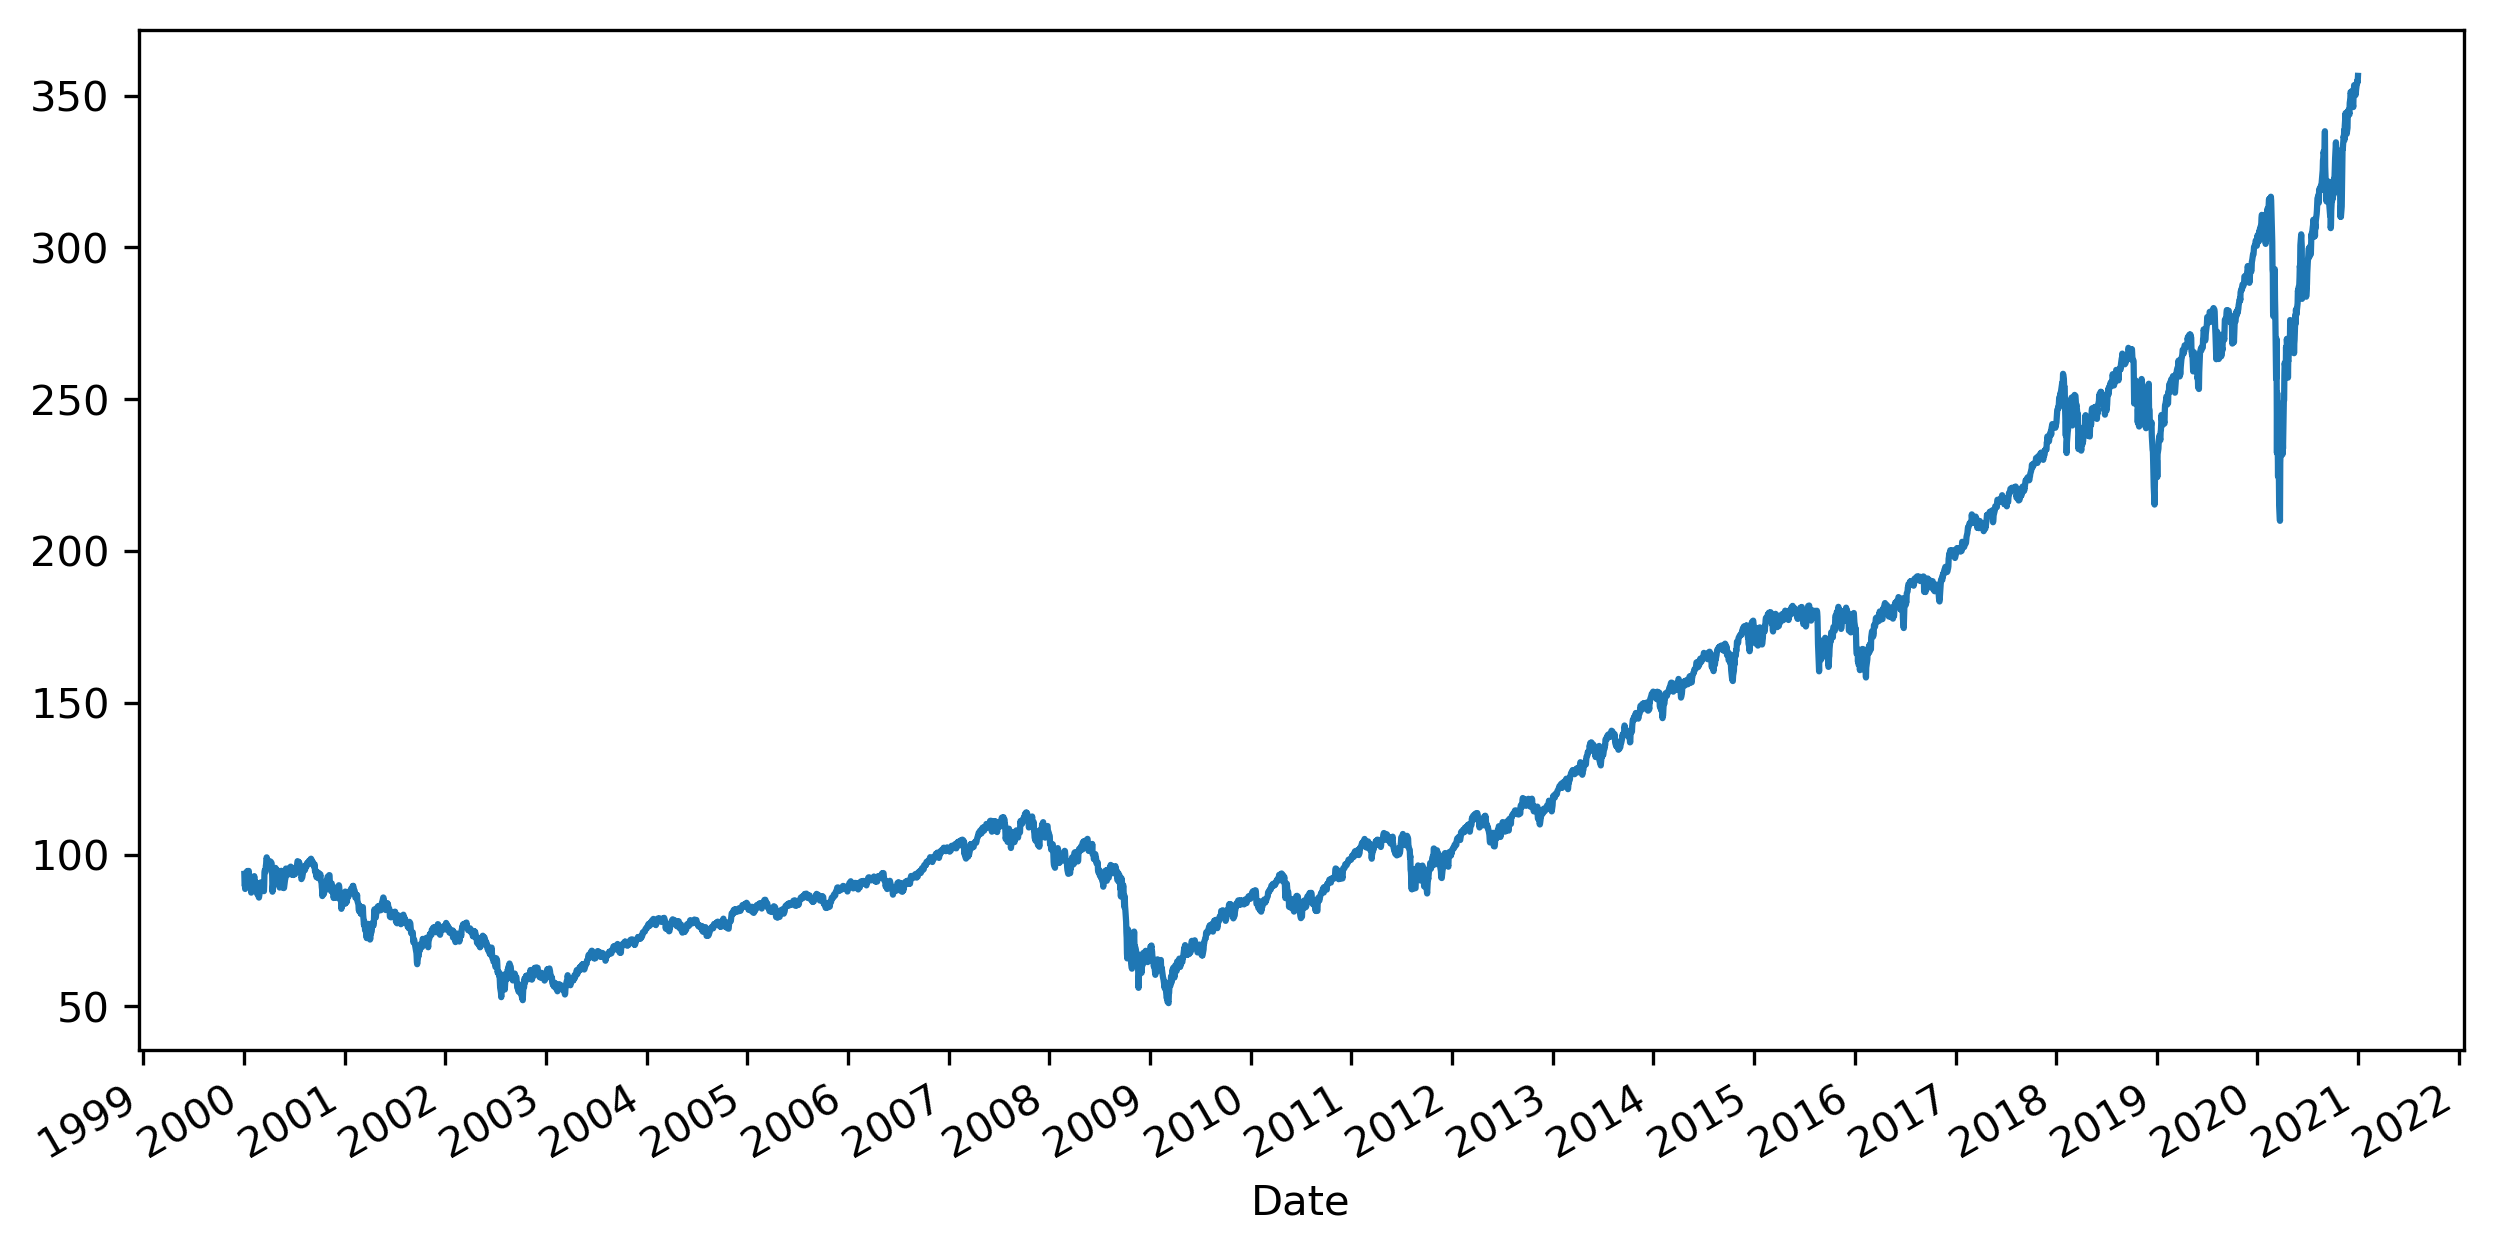

In [8]:
plt.figure(figsize=(10,5), dpi=300)
ax = data['Adj Close'].plot()

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

<Axes: ylabel='Frequency'>

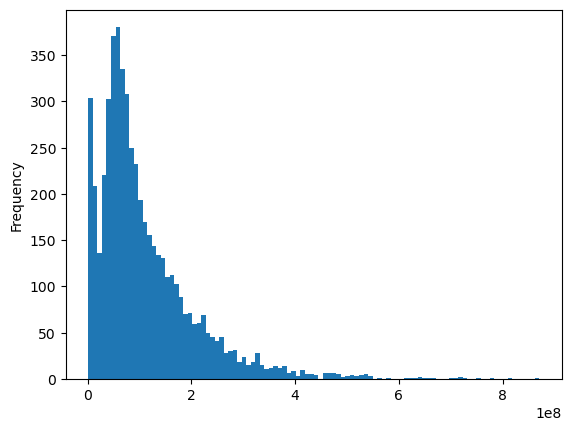

In [11]:
data['Volume'].plot(kind='hist',bins=100)

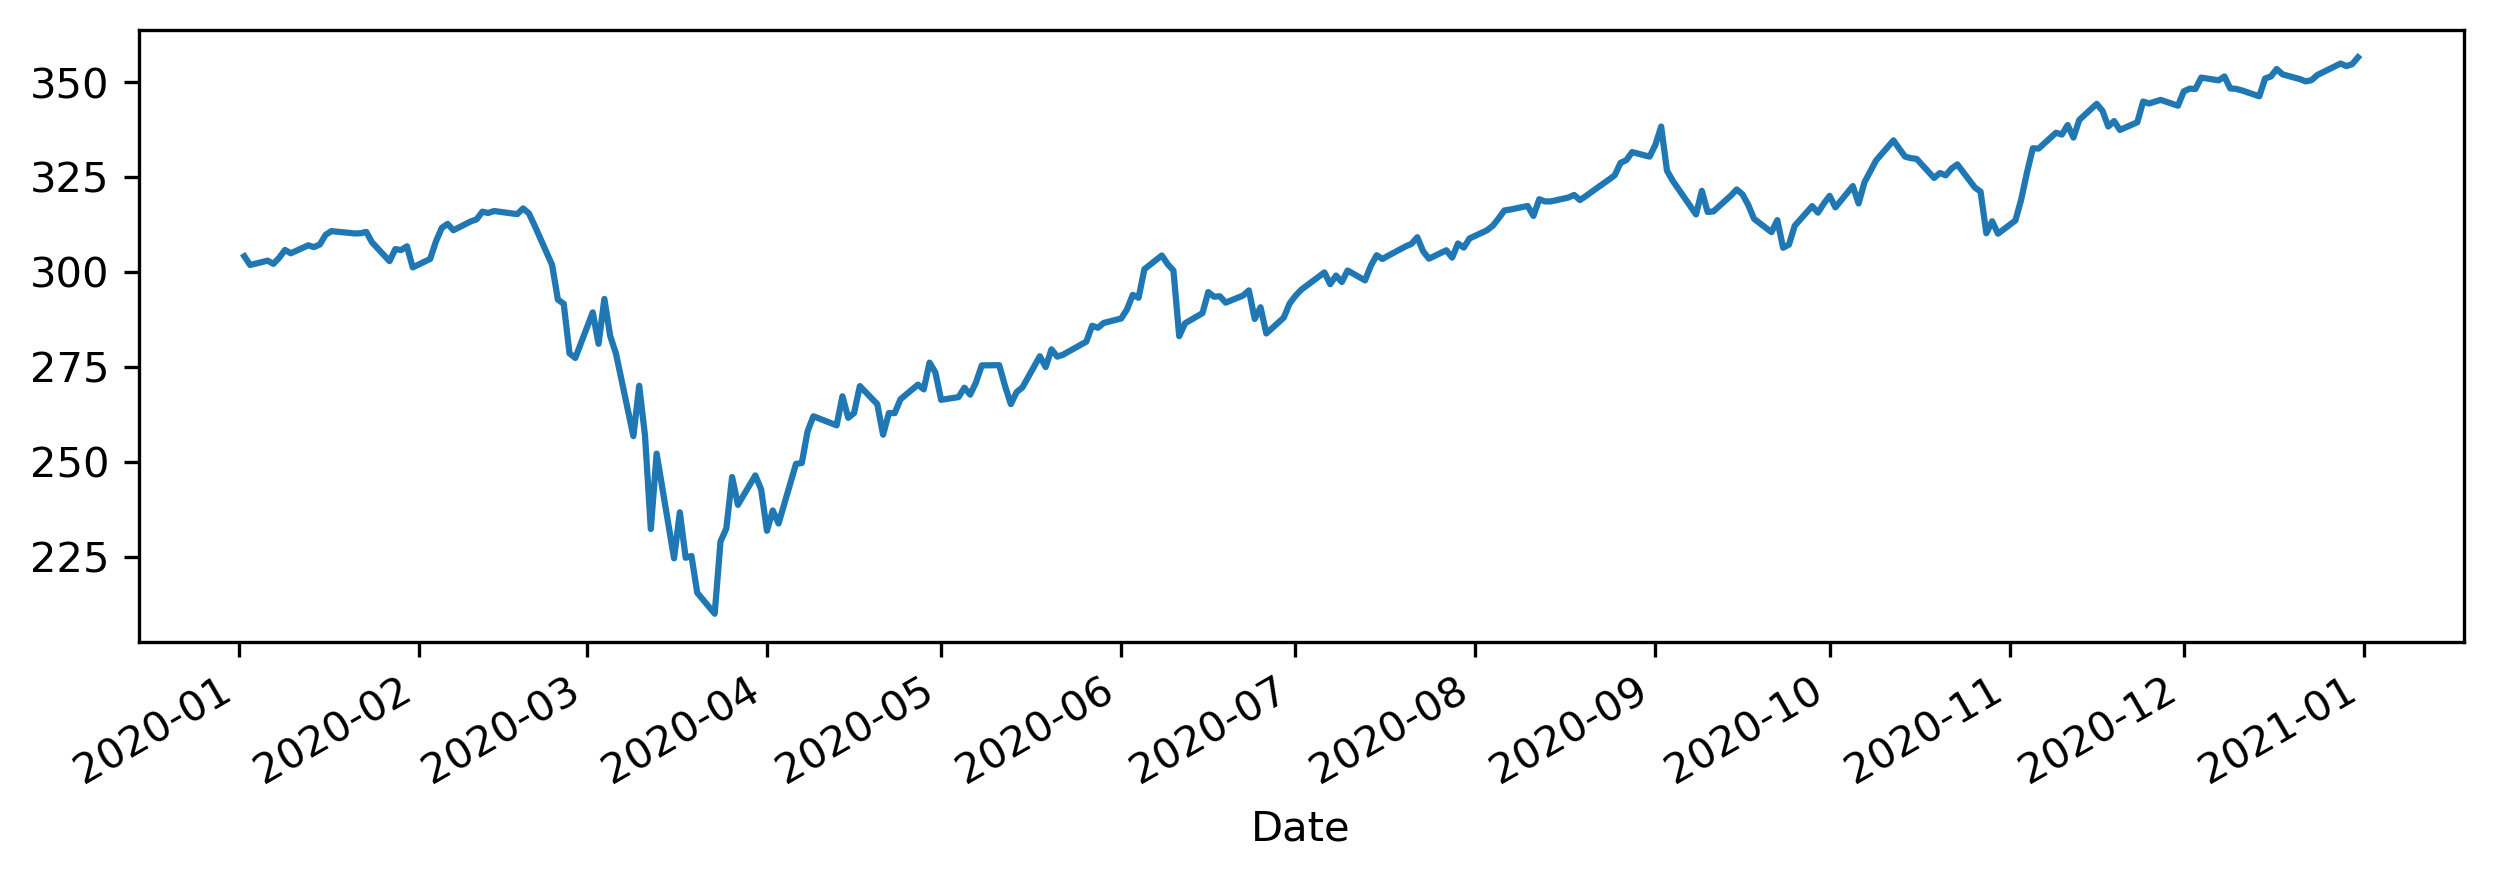

In [13]:
plt.figure(figsize=(10,3),dpi=300)
ax = data['Adj Close']['2020-01-01':'2021-01-01'].plot()

ax.xaxis.set_major_locator(dates.MonthLocator())

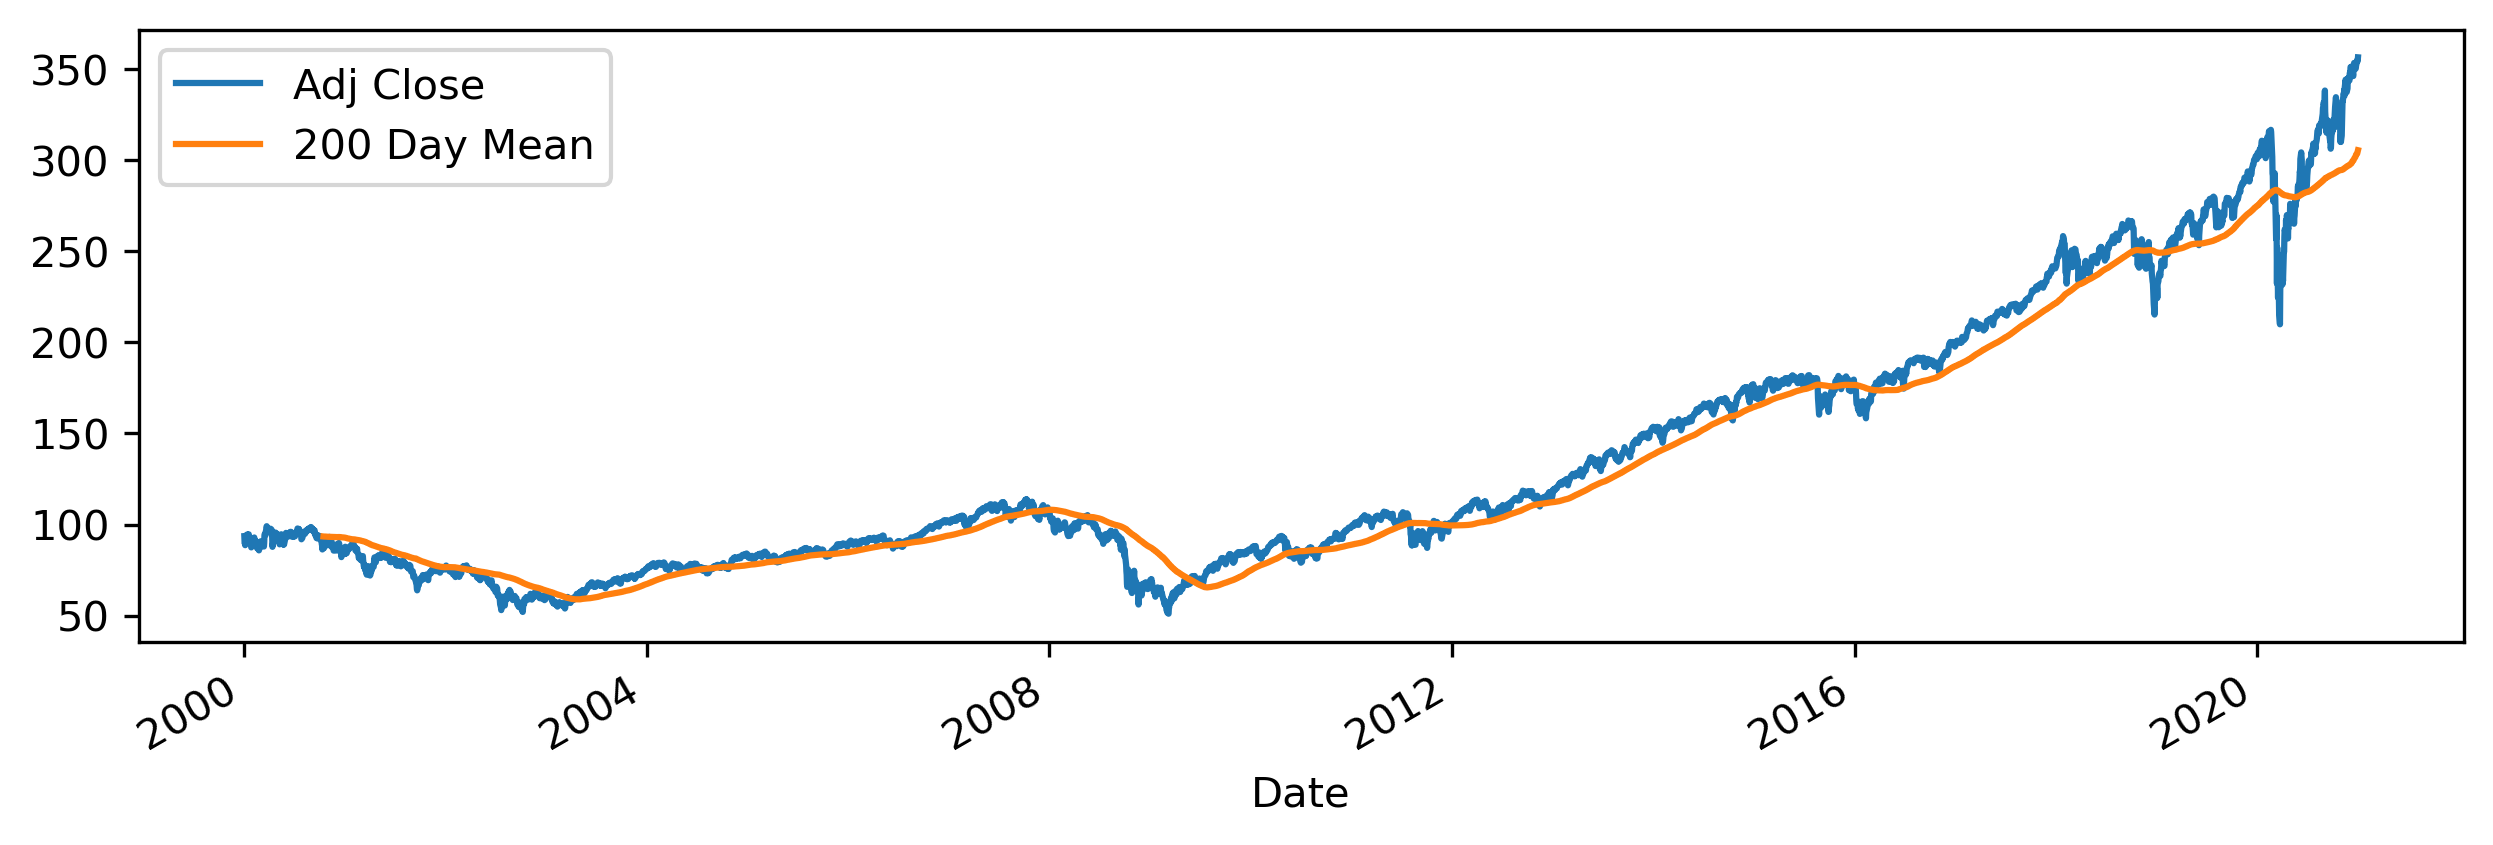

In [15]:
plt.figure(figsize=(10,3),dpi=300)
data['Adj Close'].plot(label='Adj Close')
data['Adj Close'].rolling(200).mean().plot(label='200 Day Mean')

plt.legend()

In [16]:
data['Adj Close'].iloc[-1] - data['Adj Close'].iloc[0]

262.9370651245117

In [18]:
((data['Adj Close'].iloc[-1] - data['Adj Close'].iloc[0]) / data['Adj Close'].iloc[0])*100

280.94219038587596

In [20]:
data['Adj Close'].pct_change(1).sort_values(ascending=False).head(10)

Date
2008-10-13    0.145198
2008-10-28    0.116855
2020-03-24    0.090603
2020-03-13    0.085486
2009-03-23    0.071829
2008-11-24    0.069291
2020-04-06    0.067166
2008-11-13    0.062340
2008-10-20    0.060080
2002-07-24    0.059662
Name: Adj Close, dtype: float64

In [21]:
data['Adj Close'].pct_change(1).abs().sort_values(ascending=False).head(10)

Date
2008-10-13    0.145198
2008-10-28    0.116855
2020-03-16    0.109424
2008-10-15    0.098448
2020-03-12    0.095677
2020-03-24    0.090603
2008-12-01    0.088578
2020-03-13    0.085486
2008-09-29    0.078362
2020-03-09    0.078094
Name: Adj Close, dtype: float64

In [22]:
data['Adj Close'].resample('Y').max()

Date
2000-12-31     99.070839
2001-12-31     89.693459
2002-12-31     77.573967
2003-12-31     75.664764
2004-12-31     84.098923
2005-12-31     89.655350
2006-12-31    102.355370
2007-12-31    113.858757
2008-12-31    106.014389
2009-12-31     86.392532
2010-12-31     98.404045
2011-12-31    107.080566
2012-12-31    118.605446
2013-12-31    153.668915
2014-12-31    177.056213
2015-12-31    182.025253
2016-12-31    200.248993
2017-12-31    241.805466
2018-12-31    266.941040
2019-12-31    302.306854
2020-12-31    356.528229
Freq: A-DEC, Name: Adj Close, dtype: float64

In [24]:
data.loc['2020']['Adj Close'].idxmin()

Timestamp('2020-03-23 00:00:00')

In [25]:
data.loc['2020']['Adj Close'].min()

209.93260192871094

In [26]:
data.loc['2020-01-01':'2020-04-01']['Adj Close'].idxmax()

Timestamp('2020-02-19 00:00:00')

In [34]:
data.loc['2020-01-01':'2020-04-01']['Adj Close'].max()

316.722900390625

In [28]:
data_afterCrash = data.loc['2020-04-01':]

In [29]:
data_afterCrash.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,247.979996,257.660004,243.899994,246.149994,231.778015,189554600
2020-04-02,245.190002,252.679993,244.589996,251.830002,237.126404,177660400
2020-04-03,250.759995,253.320007,245.220001,248.190002,233.698929,135561200
2020-04-06,257.839996,267.000000,248.169998,264.859985,249.395615,188061200
2020-04-07,274.209991,275.029999,264.890015,265.130005,249.649902,201427200


In [33]:
data_afterCrash[data_afterCrash['Adj Close']>data.loc['2020-01-01':'2020-04-01']['Adj Close'].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-10,335.059998,335.769989,332.959991,335.570007,317.367554,44282100
2020-08-12,335.440002,338.279999,335.410004,337.440002,319.136169,53774400
2020-08-13,336.609985,338.250000,335.829987,336.829987,318.559204,41816100
2020-08-14,336.410004,337.420013,335.619995,336.839996,318.568634,47260400
2020-08-17,337.940002,338.339996,336.850006,337.910004,319.580658,35481000
...,...,...,...,...,...,...
2020-12-24,368.079987,369.029999,367.450012,369.000000,351.874725,26457900
2020-12-28,371.739990,372.589996,371.070007,372.170013,354.897675,39000400
2020-12-29,373.809998,374.000000,370.829987,371.459991,354.220520,53680500


In [36]:
data_afterCrash[data_afterCrash['Adj Close']>data.loc['2020-01-01':'2020-04-01']['Adj Close'].max()].index[0]

Timestamp('2020-08-10 00:00:00')

In [37]:
data.loc['2020-01-01':'2020-04-01']['Adj Close'].idxmax() - data_afterCrash[data_afterCrash['Adj Close']>data.loc['2020-01-01':'2020-04-01']['Adj Close'].max()].index[0]

Timedelta('-173 days +00:00:00')